### $$\text{Lab 1: Fundamentals of Convolutional Neural Networks (GRADED)}$$

## **Step 1: Import the relevant packages:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import tensorflow as tf
import random
from keras.optimizers import SGD

In [2]:
# assert len(tf.config.list_physical_devices('GPU')) > 0

## **Step 2: Download the MNIST dataset:**

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [50]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


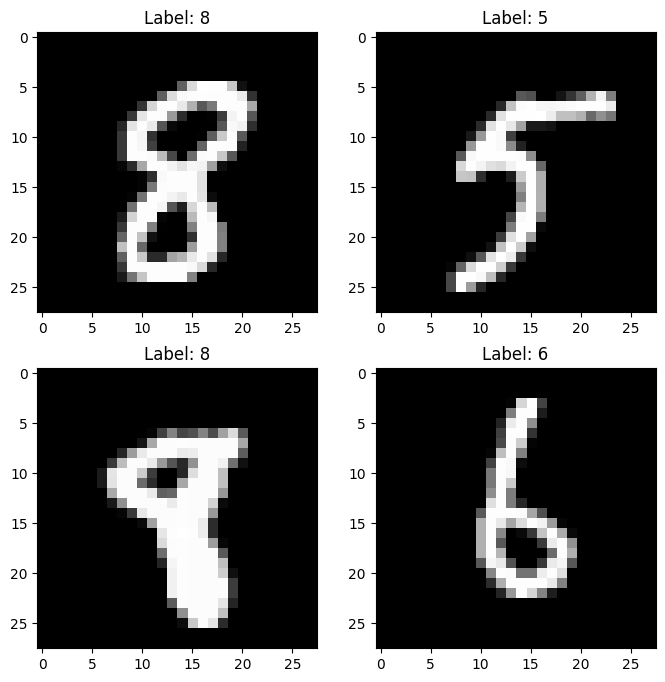

In [5]:
random_indices = np.random.randint(0, X_train.shape[0], 4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title('Label: {}'.format(y_train[idx]))
    
plt.show()

## **Step 3: Data Preprocessing:**

In [ ]:
X_train[0] #Ranges from 0 to 255

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
X_train_sample = X_train[0] #Ranges from 0 to 1

In [ ]:
X_test_sample = X_test[0]

In [52]:
y_train[0] #Just give the number

5

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
y_train[0] #One hot encoding

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## **Step 4: Fully connected Neural Network architecture:**

In [12]:
def build_fc_model ():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [13]:
model = build_fc_model()

## **Step 5: Compile the model:**

In [14]:
# We can try different optimizers and loss functions to check furthre details but it is a basic version of the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy']) 

## **Step 6: Train the model**

In [15]:
# We can try different batch sizes and epochs to check furthre details but it is a basic version of the model
history = model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
6000/6000 [==============================] - 20s 3ms/step - loss: 0.4248 - accuracy: 0.8853
Epoch 2/5
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2355 - accuracy: 0.9336
Epoch 3/5
6000/6000 [==============================] - 17s 3ms/step - loss: 0.1865 - accuracy: 0.9474
Epoch 4/5
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1554 - accuracy: 0.9567
Epoch 5/5
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1338 - accuracy: 0.9627


In [16]:
train_accuracy = max(history.history['accuracy'])
train_loss = min(history.history['loss'])

In [17]:
print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)
print("-" * 40)

Training Accuracy: 0.9627166390419006
Training Loss: 0.1338067501783371
----------------------------------------


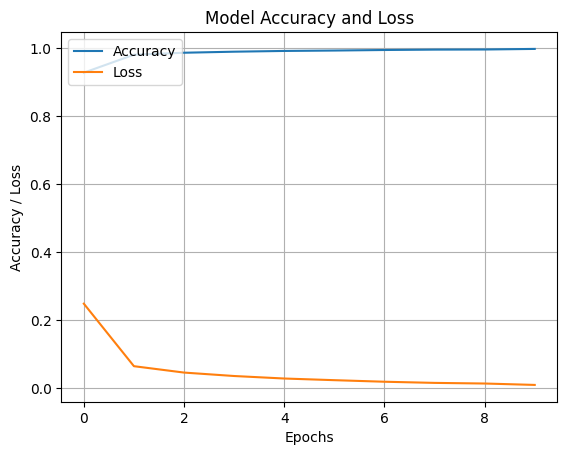

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.grid()

plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12894068658351898
Test accuracy: 0.9610000252723694


### $$\text{Exercise 2: MNIST Dataset with Convolutional Neural Network}$$

## **Step 1 till Step 3 remains the same in this exercise as in Exercise 1.**

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [22]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


## **Step 4: Convolutional Neural Network Architecture:**

In [23]:
def build_cnn_model ():
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(36, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [24]:
model = build_cnn_model()

In [25]:
sample = X_train[[0]]

In [26]:
model.predict(sample).round(3)

1/1 [==============================] - 0s 256ms/step


array([[0.119, 0.099, 0.089, 0.095, 0.101, 0.09 , 0.107, 0.112, 0.097,
        0.092]], dtype=float32)

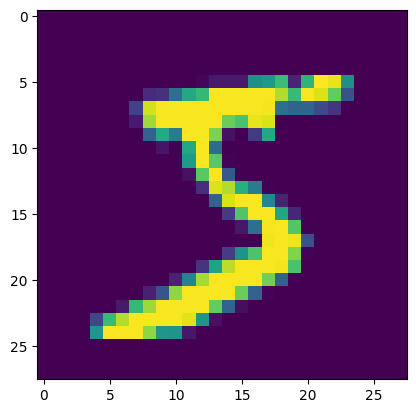

In [27]:
sample = sample.reshape(28, 28)
plt.imshow(sample)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 36)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## **Step 5: Train and test the CNN model**

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 32s 65ms/step - loss: 0.2482 - accuracy: 0.9274
Epoch 2/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0644 - accuracy: 0.9802
Epoch 3/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0457 - accuracy: 0.9861
Epoch 4/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0282 - accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 7/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 10/10
469/469 [==============================] - 31s 66ms/step - loss: 0.009

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02577671781182289
Test accuracy: 0.991599977016449


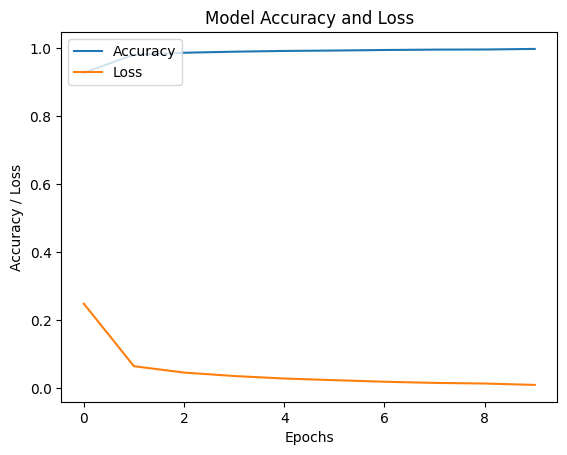

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')

plt.show()

## **Step 6: Make predictions with the CNN model**

In [33]:
model.predict(X_test[[5]])

1/1 [==============================] - 0s 147ms/step


array([[2.9204514e-08, 9.9996114e-01, 8.6409969e-08, 3.0847006e-11,
        3.3593940e-06, 2.3806689e-11, 3.5808301e-10, 3.1549785e-05,
        3.8058497e-06, 7.0024688e-09]], dtype=float32)

In [34]:
print(y_test[5])

1


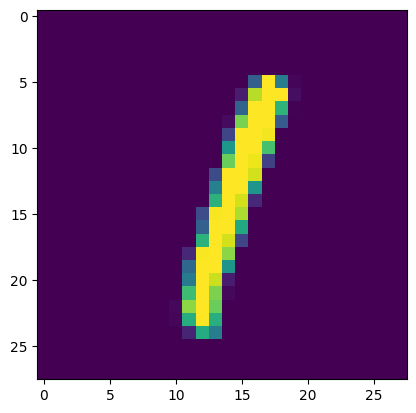

In [35]:
plt.imshow(X_test[[5]].reshape(28, 28))

### $$\text{Lab 1: Fundamentals of Convolutional Neural Networks (UNGRADED)}$$

In [36]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [37]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

7